# EDA of Time Period without `ENSPLT0`
___

## Imports

In [1]:
# !pip install scikit-optimize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from skopt import BayesSearchCV

## Custom Functions

In [3]:
#Return visualizations for each fold

data = pd.read_csv('../data/eda_booker_report.csv', index_col='Unnamed: 0')

def eda(model, target):
    model_info = f"""Model info
    Best Estimator: {model.best_estimator_}
    N Splits: {model.n_splits_}
    N Features In: {model.n_features_in_}
    Best Score: {model.best_score_}
    """
    print(model_info)
    
    X_data = data.drop(columns=[target])
    columns = list(X_data.columns)
    # print(columns)

    for idx in range(len(columns)):
        # print(f'{columns[idx]}\n')
        plt.plot(pd.DataFrame(model.best_estimator_.coef_)[idx])
        plt.title(f"Coefficients for {columns[idx]} for each class")
        plt.show()

In [4]:
# sort coef values for each split
def eda_confusion(model, target):
    # Coefficients
    df_model = pd.DataFrame(model.best_estimator_.coef_, columns = [data.drop(columns=[target]).columns]).T
    
    for target_class in range(5):
        print(f'Top 10 Coefficients for Target {target_class}')
        print(f'for every one unit increase, the chance for it being target {target_class} increases by the coefficient.')
        print(np.exp(df_model[target_class].sort_values(ascending=False)).head(10))
        print('\n')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, model.predict(X_test_sc));
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(baseline[0]))
    disp.plot()
    return plt.show()

## Analyzing Models

### Baseline Model

In [5]:
classes = ['Koon', 'PROTECT', 'Booker', 'Gall', 'Missing']
target_classes = pd.Series(dict(zip(sorted(list(data['ERIOD'].unique())), classes)))
target_classes

1       Koon
2    PROTECT
3     Booker
4       Gall
5    Missing
dtype: object

In [6]:
counts = pd.Series(data['ERIOD'].value_counts(normalize = True))
baseline = pd.concat([target_classes, counts], axis=1)
baseline
# counts

,0,ERIOD
1,Koon,0.416955
2,PROTECT,0.050395
3,Booker,0.179911
4,Gall,0.319368
5,Missing,0.033371


### BayesSearchCV

In [7]:
with open('../models/eriod/eriod_bs_lg', 'rb') as p_in_bs:
    bs_logreg = pickle.load(p_in_bs)

/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/7l/441dnk_52sgfldpwf_5_7dmr0000gn/T/ipykernel_75469/191776913.py:2: DeprecationWarning: Please use `OptimizeResult` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  bs_logreg = pickle.load(p_in_bs)


Model info
    Best Estimator: LogisticRegression(C=0.12648552168552957, max_iter=1000000, random_state=42)
    N Splits: 5
    N Features In: 27
    Best Score: 0.9782589285714286
    


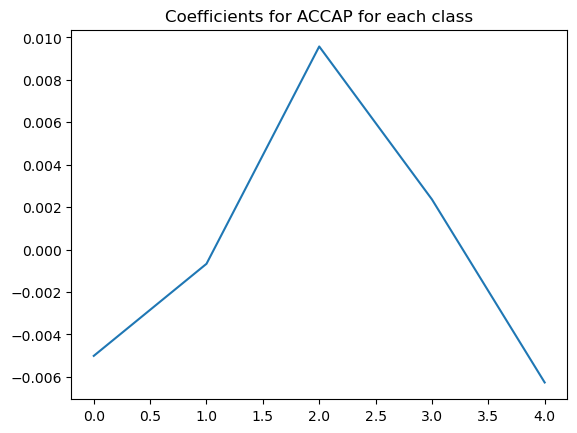

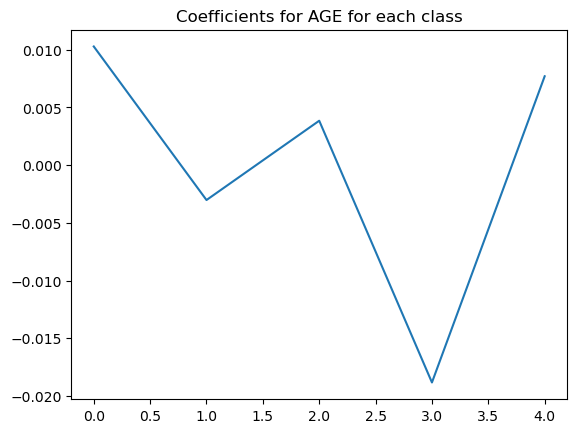

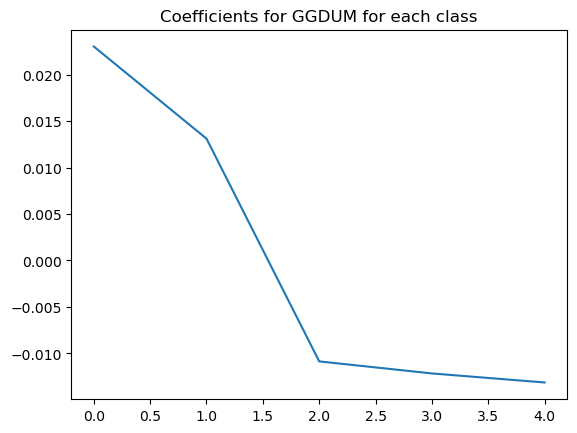

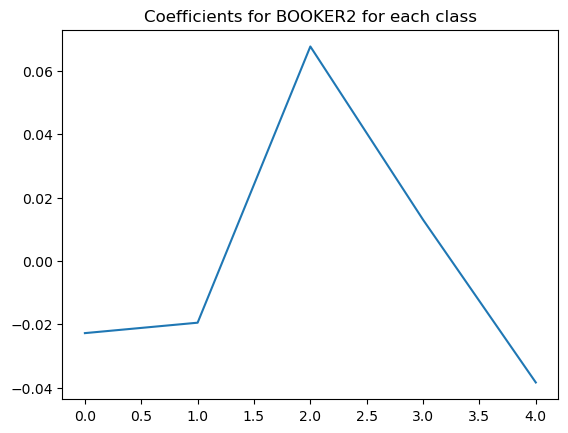

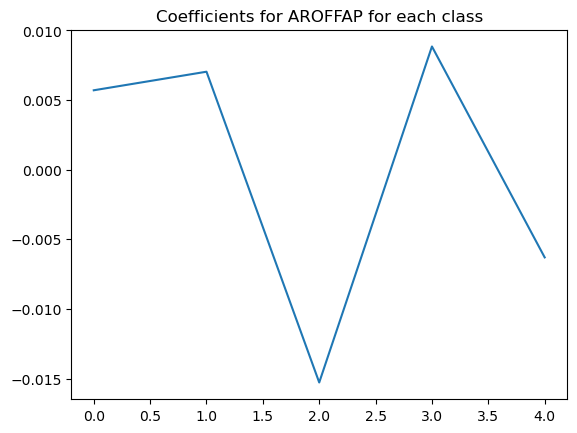

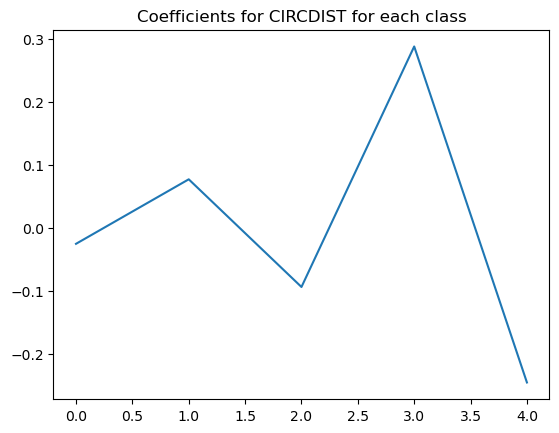

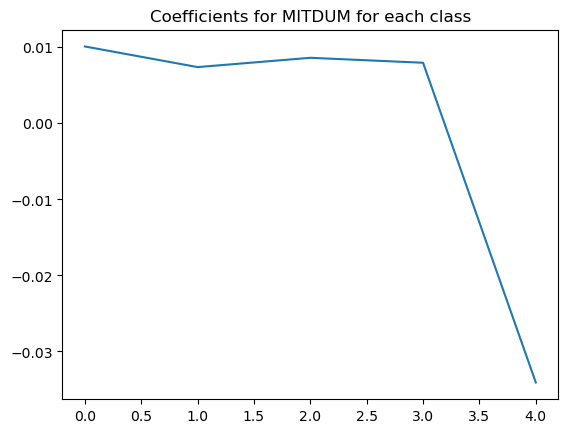

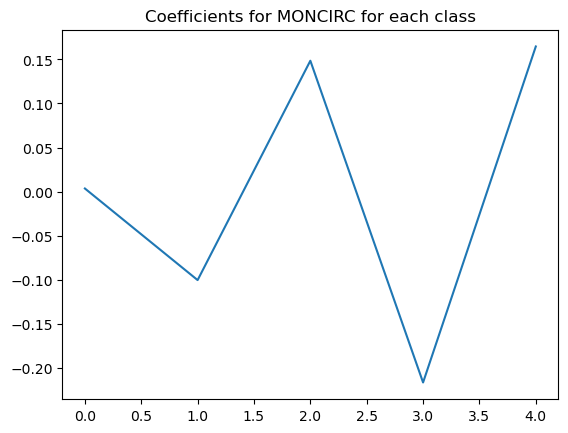

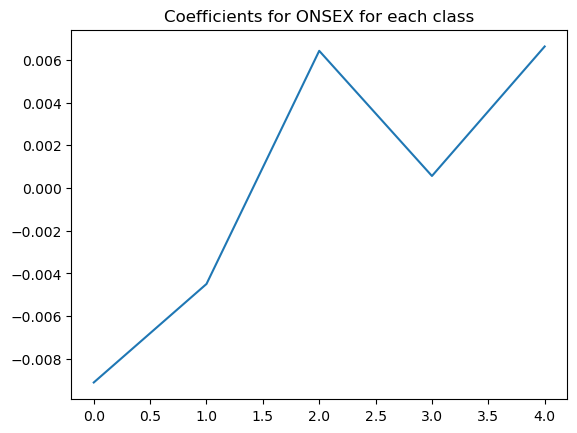

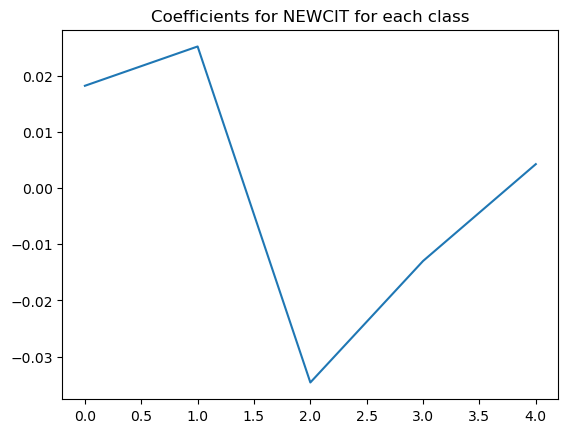

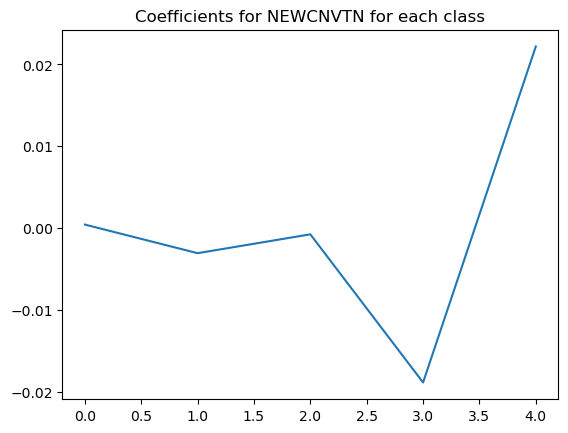

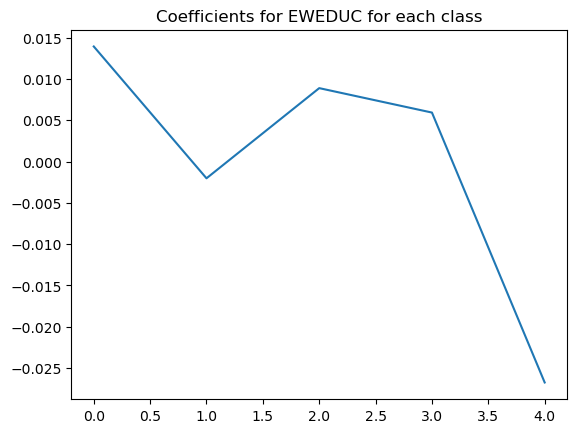

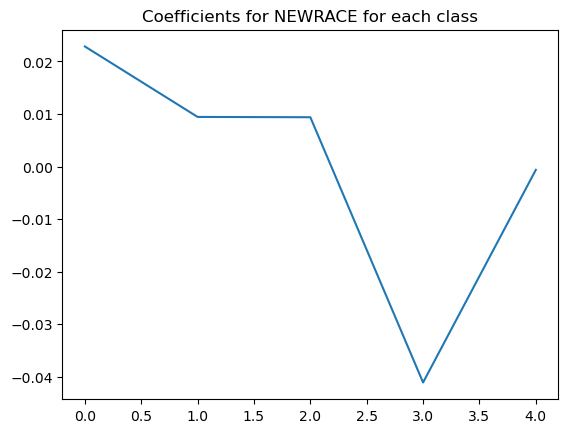

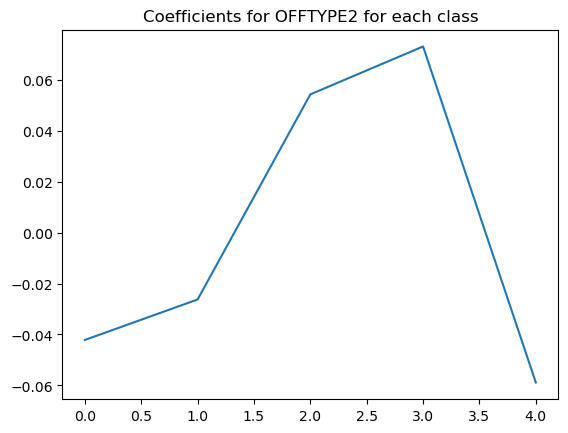

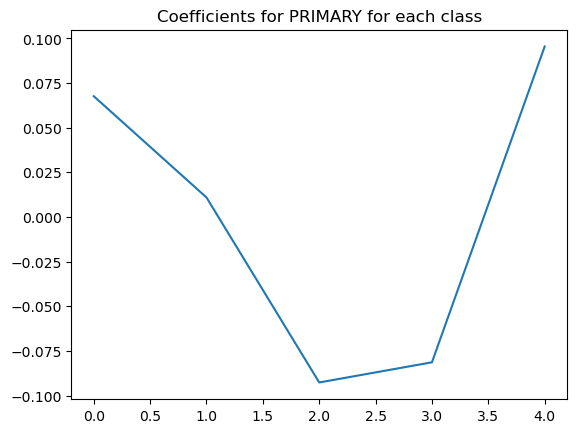

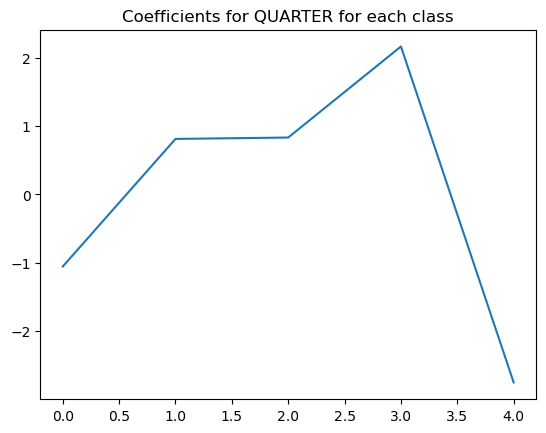

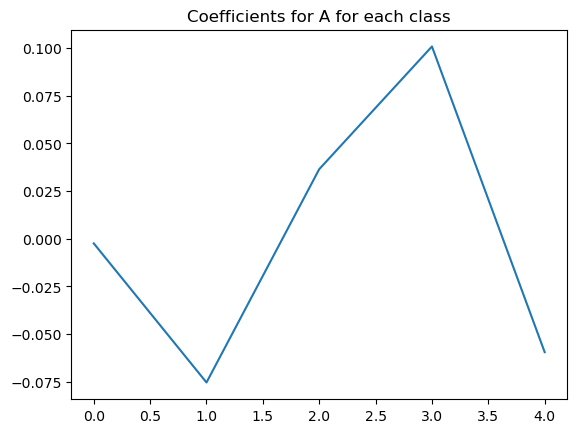

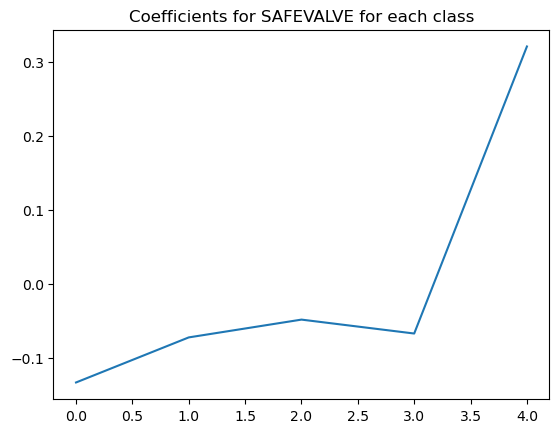

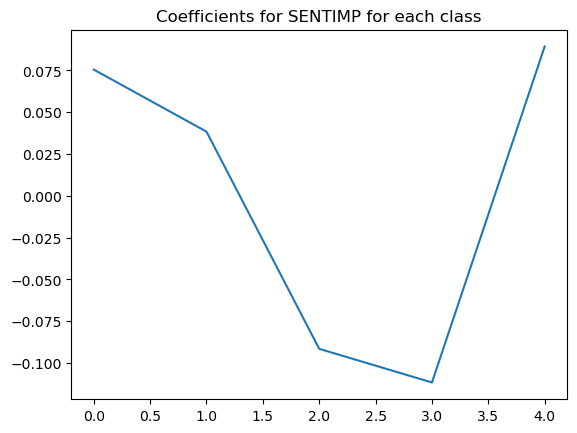

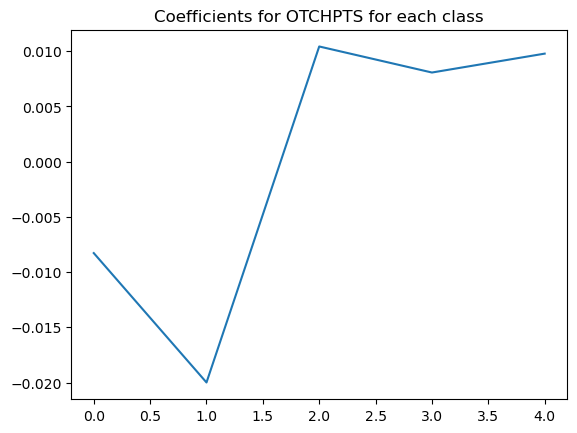

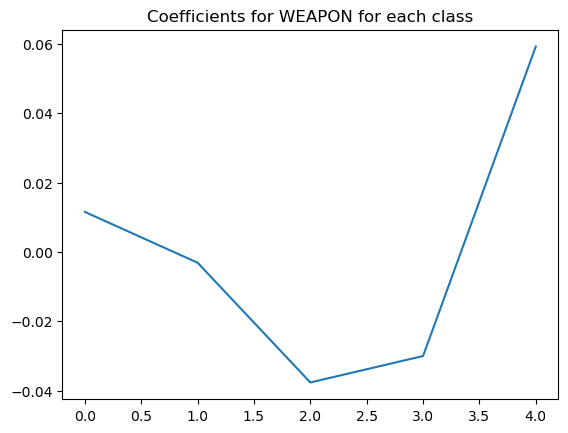

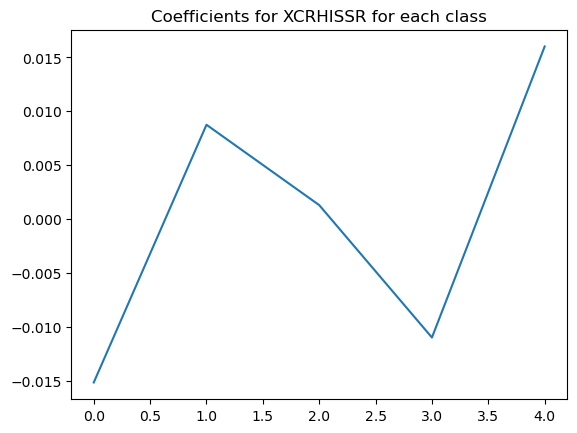

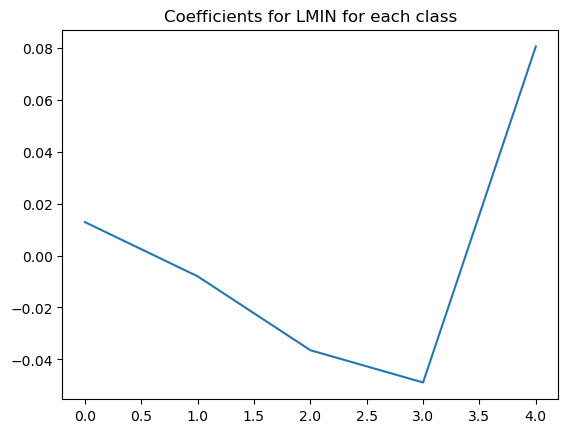

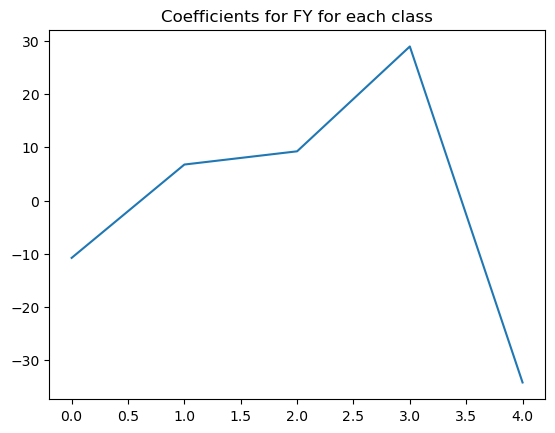

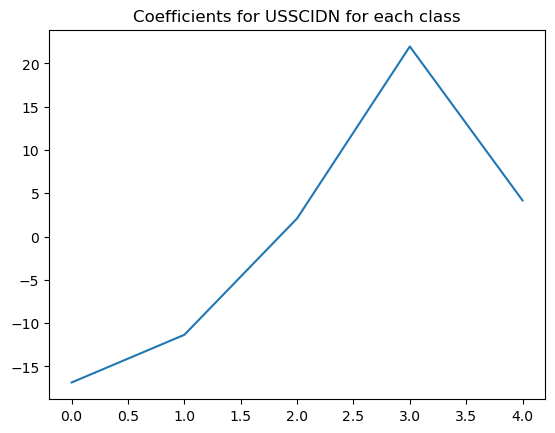

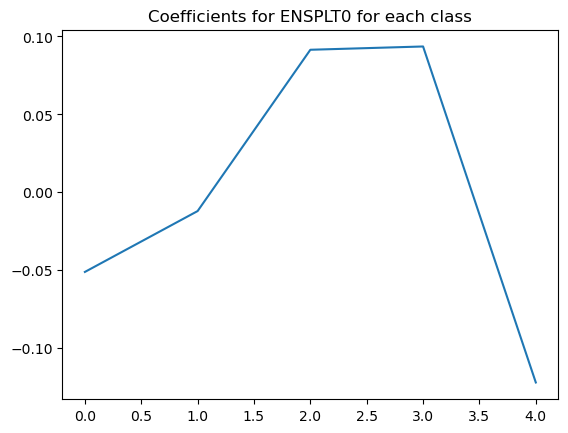

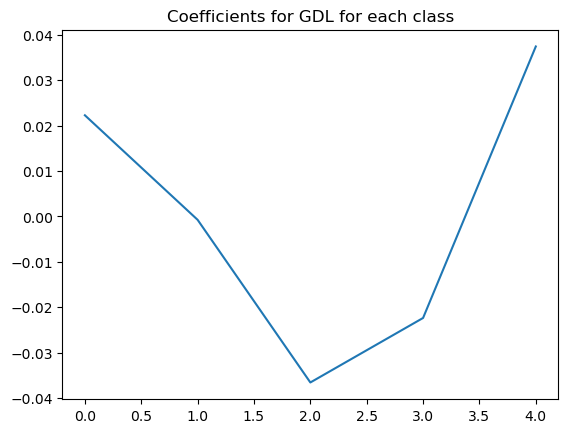

In [8]:
eda(bs_logreg, 'ERIOD')

### GridSearchCV

In [9]:
with open('../models/eriod/eriod_gs_lg', 'rb') as p_in_gs:
    gs_logreg = pickle.load(p_in_gs)

/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model info
    Best Estimator: LogisticRegression(random_state=42)
    N Splits: 5
    N Features In: 27
    Best Score: 0.9772464285714285
    


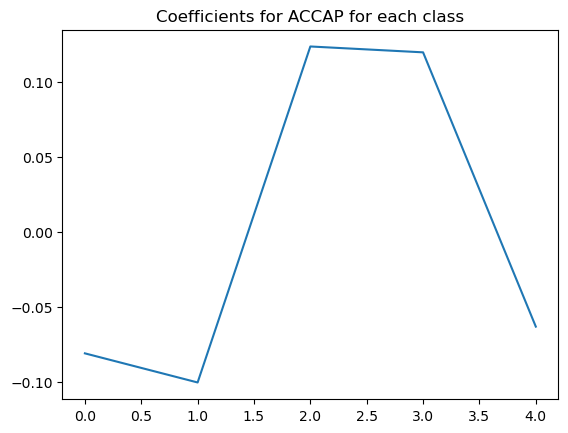

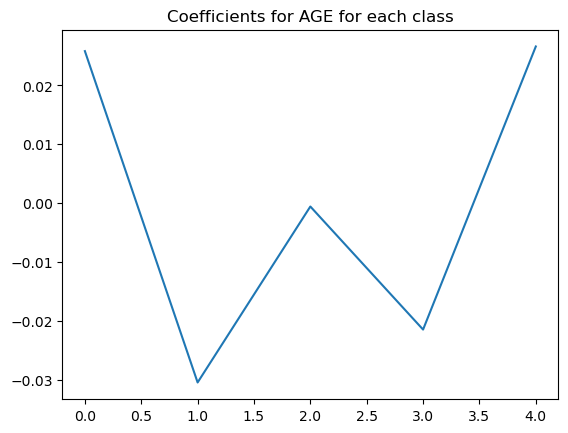

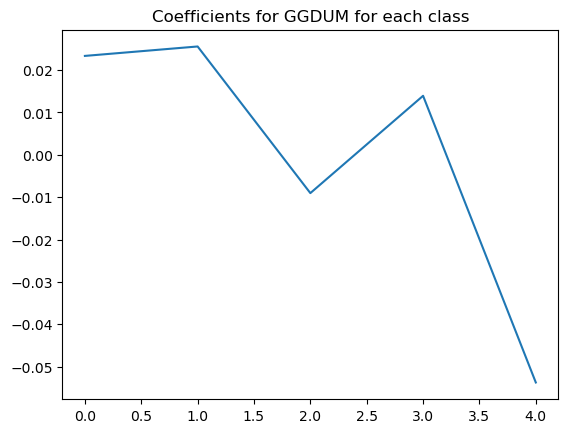

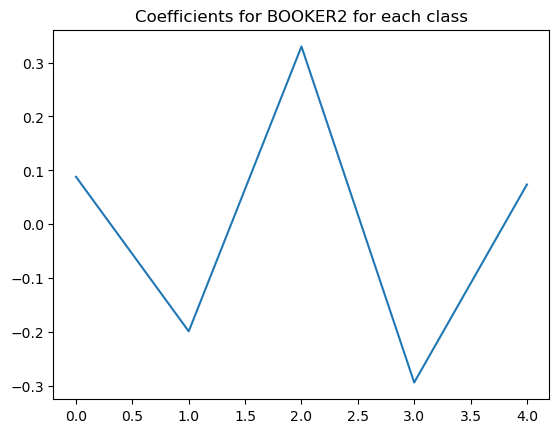

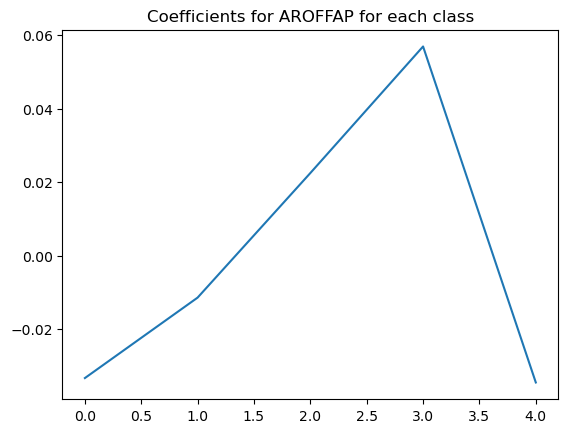

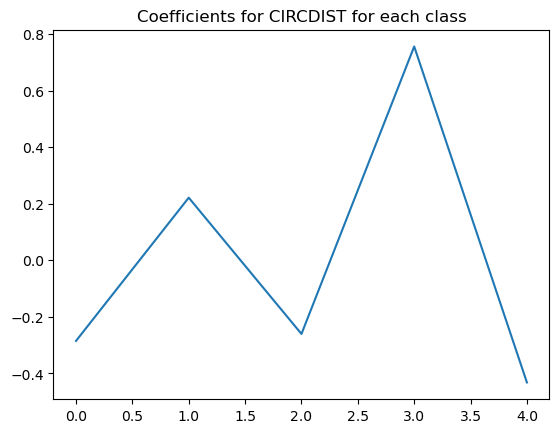

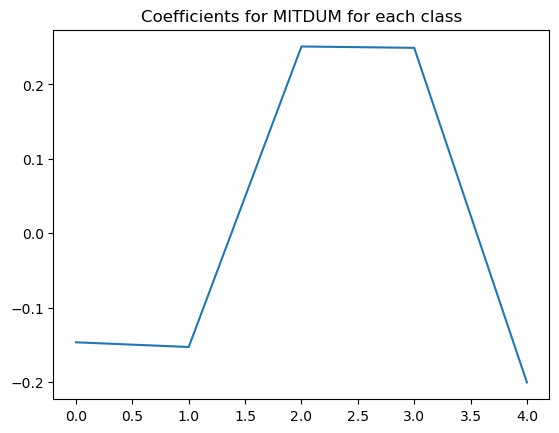

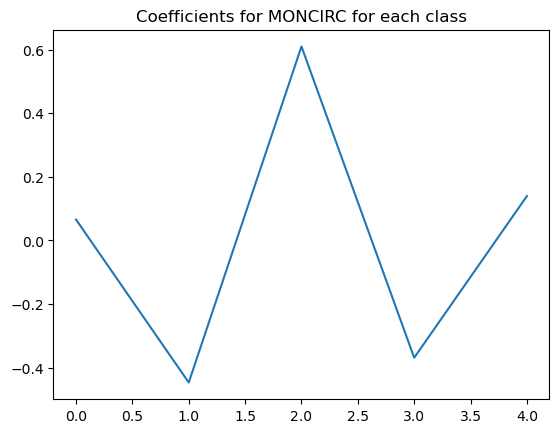

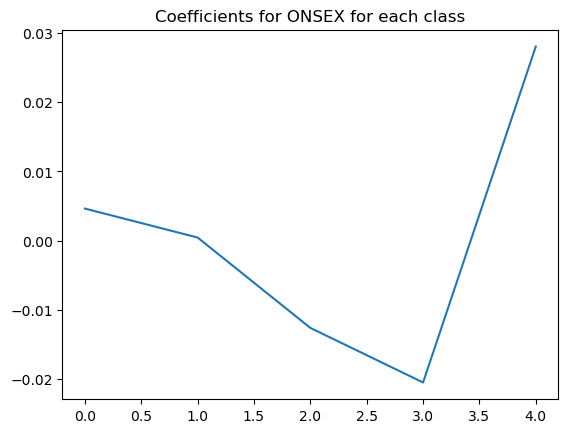

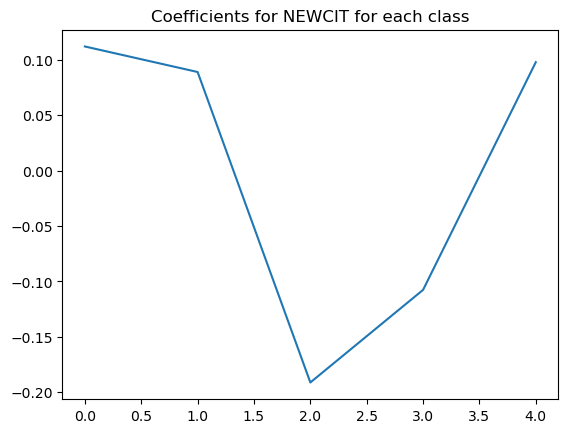

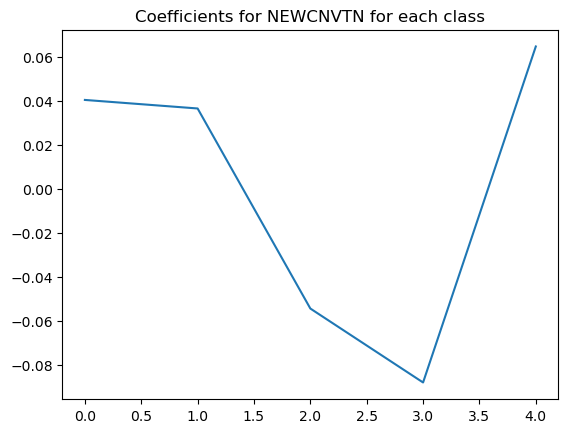

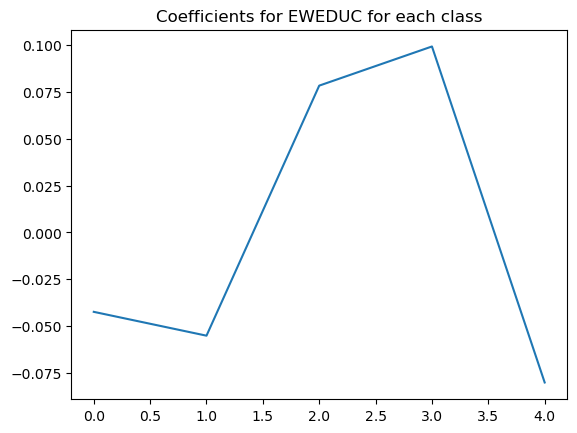

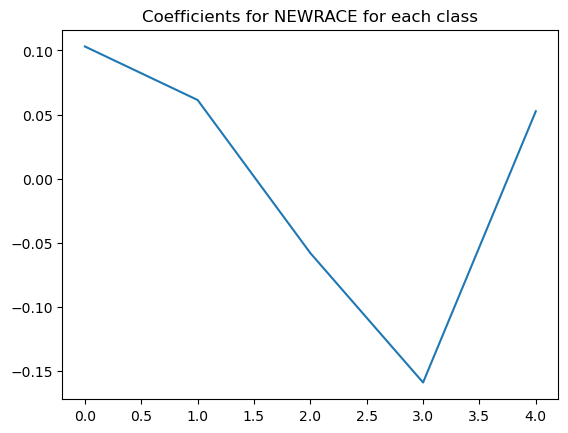

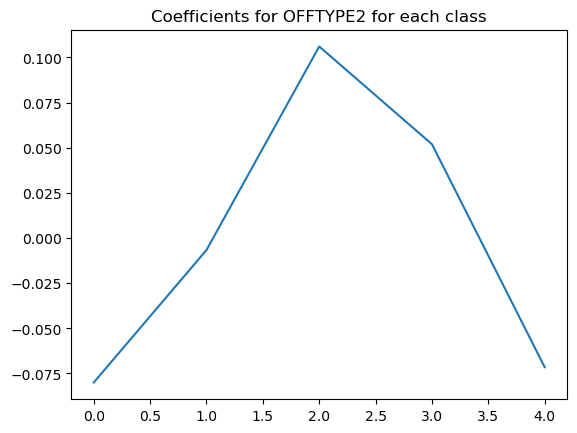

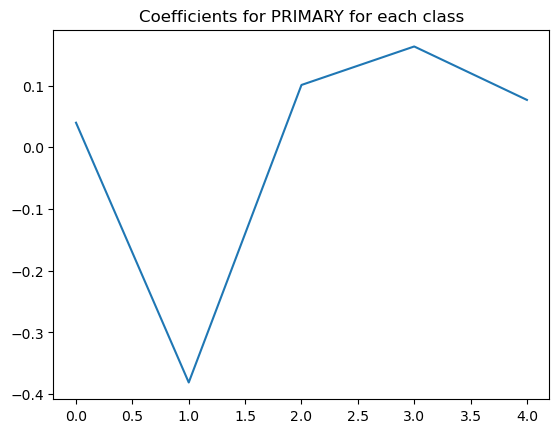

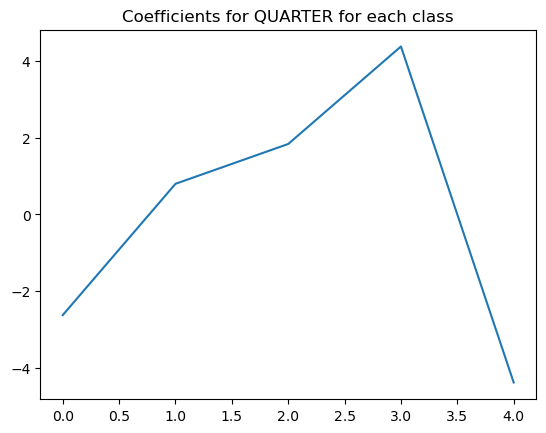

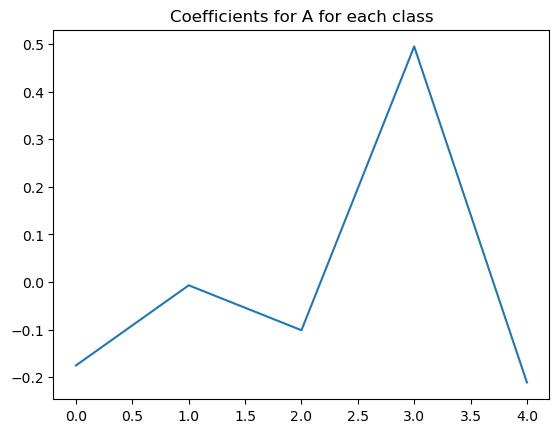

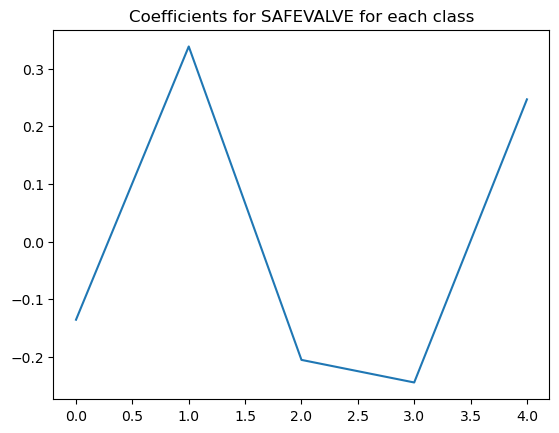

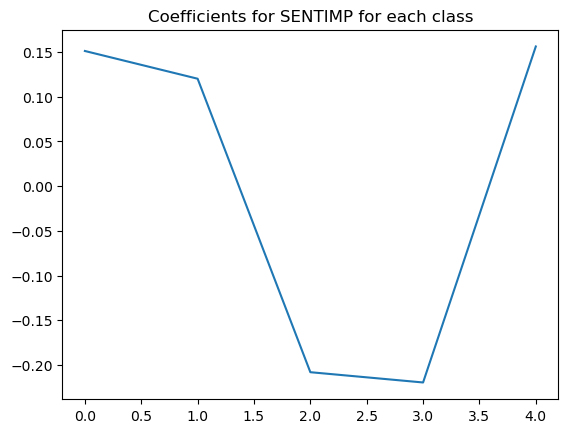

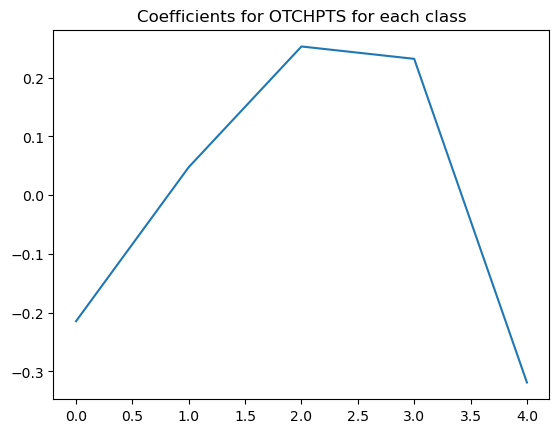

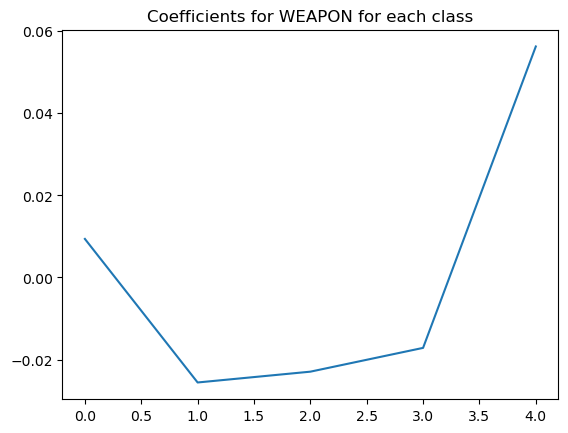

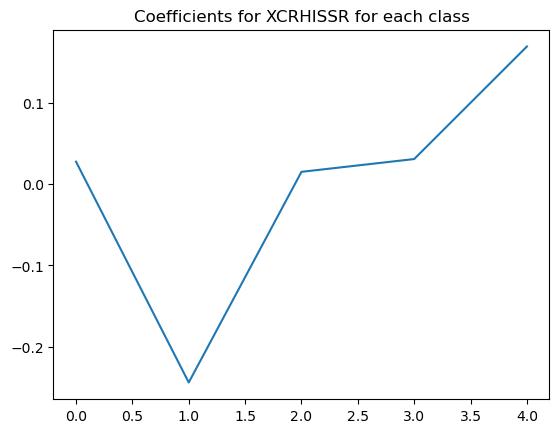

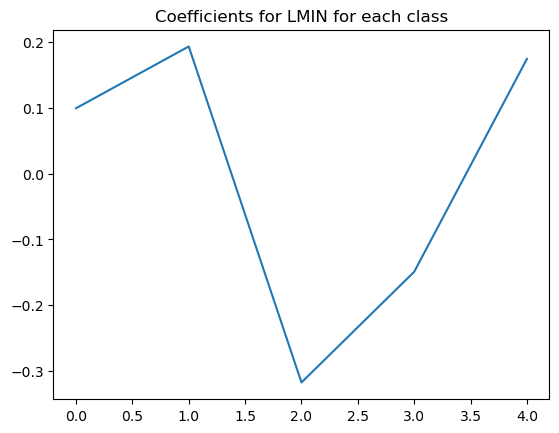

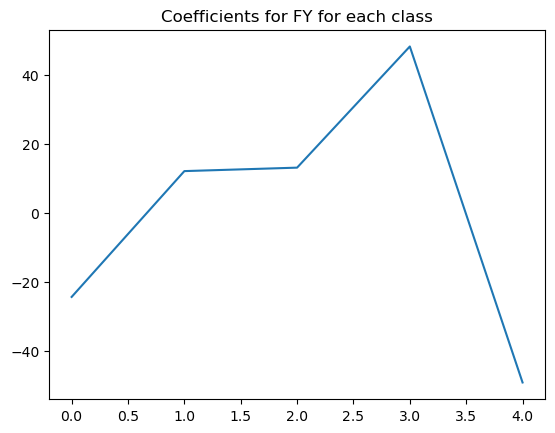

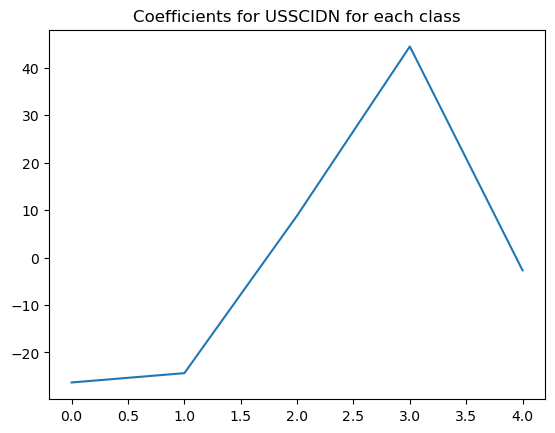

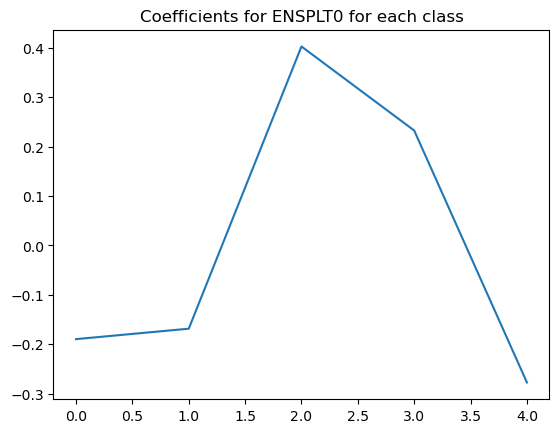

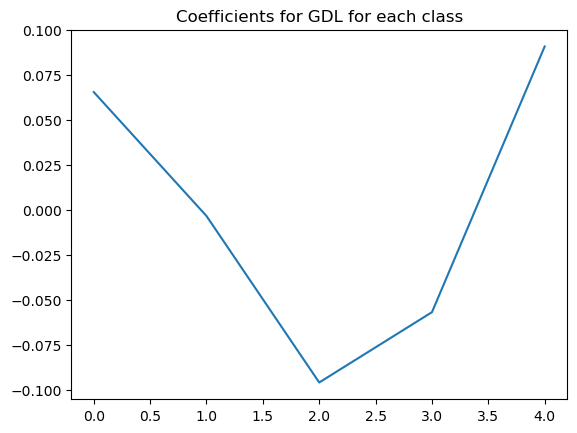

In [10]:
eda(gs_logreg, 'ERIOD')

## Confusion Matrices

In [11]:
X = data.drop(columns = ['ERIOD'])
y = data['ERIOD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [12]:
target_classes

1       Koon
2    PROTECT
3     Booker
4       Gall
5    Missing
dtype: object

Top 10 Coefficients for Target 0
for every one unit increase, the chance for it being target 0 increases by the coefficient.
SENTIMP    1.078396
PRIMARY    1.069951
GGDUM      1.023302
NEWRACE    1.023111
GDL        1.022498
NEWCIT     1.018346
EWEDUC     1.014034
LMIN       1.012956
WEAPON     1.011611
AGE        1.010339
Name: 0, dtype: float64


Top 10 Coefficients for Target 1
for every one unit increase, the chance for it being target 1 increases by the coefficient.
FY          866.108453
QUARTER       2.251875
CIRCDIST      1.080173
SENTIMP       1.039101
NEWCIT        1.025493
GGDUM         1.013201
PRIMARY       1.010987
NEWRACE       1.009492
XCRHISSR      1.008794
MITDUM        1.007421
Name: 1, dtype: float64


Top 10 Coefficients for Target 2
for every one unit increase, the chance for it being target 2 increases by the coefficient.
FY          10393.765411
USSCIDN         8.102294
QUARTER         2.298083
MONCIRC         1.160079
ENSPLT0         1.095754
BOOKER2         1.

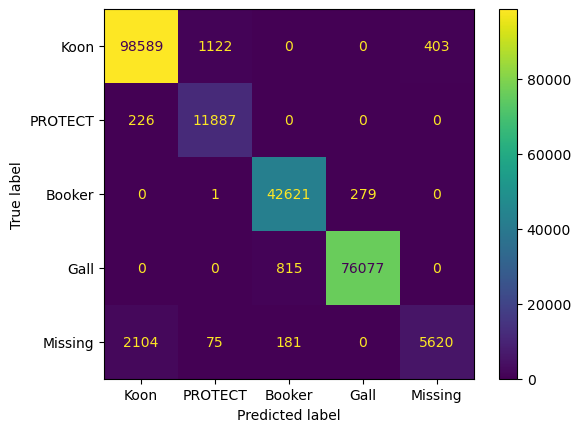

In [13]:
# Bayes Search
bs_matrix_eriod = eda_confusion(bs_logreg, 'ERIOD')

Top 10 Coefficients for Target 0
for every one unit increase, the chance for it being target 0 increases by the coefficient.
SENTIMP     1.163168
NEWCIT      1.118570
NEWRACE     1.108520
LMIN        1.104277
BOOKER2     1.092151
MONCIRC     1.067873
GDL         1.067680
NEWCNVTN    1.041399
PRIMARY     1.040653
XCRHISSR    1.028292
Name: 0, dtype: float64


Top 10 Coefficients for Target 1
for every one unit increase, the chance for it being target 1 increases by the coefficient.
FY           182641.353839
QUARTER           2.220400
SAFEVALVE         1.402793
CIRCDIST          1.247899
LMIN              1.212849
SENTIMP           1.127643
NEWCIT            1.093093
NEWRACE           1.063228
OTCHPTS           1.048971
NEWCNVTN          1.037365
Name: 1, dtype: float64


Top 10 Coefficients for Target 2
for every one unit increase, the chance for it being target 2 increases by the coefficient.
FY          497332.965153
USSCIDN       7041.847317
QUARTER          6.278013
MONCIRC        

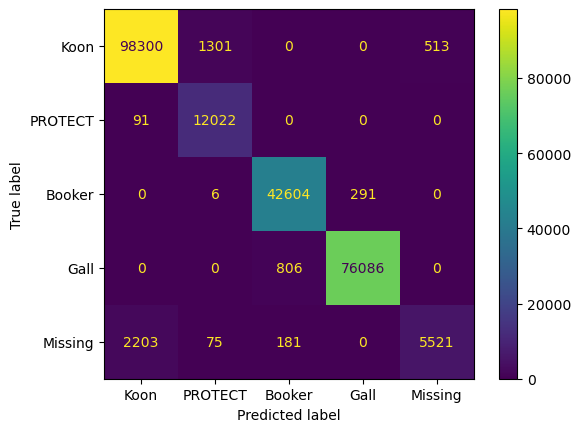

In [14]:
# Grid Search
eda_confusion(gs_logreg, 'ERIOD')